<a href="https://colab.research.google.com/github/loisll/MMAI831/blob/main/Assignment5_Finance_teamBay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import yfinance as yf
from datetime import datetime

[*********************100%***********************]  3 of 3 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLZ24.NYM']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


<Axes: xlabel='Date'>

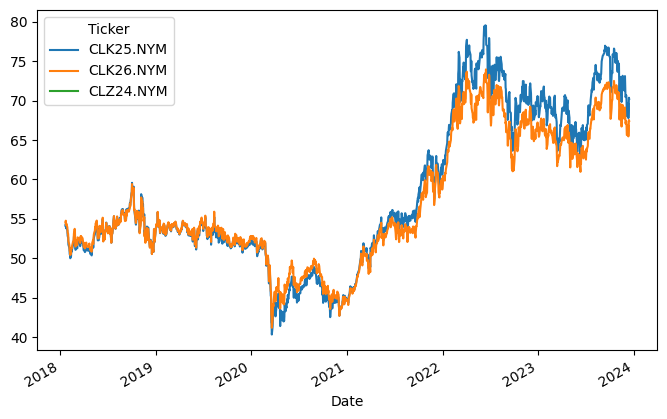

In [88]:
data = yf.download("CLZ24.NYM, CLK25.NYM, CLK26.NYM", start="2018-01-01", end="2023-12-18")
data.head()
data['Close'].plot(figsize=(8,5))

##a. Download the current futures prices for the following underlying with all maturities:
•	Gold

•	Crude Oil

•	Natural gas

•	SP 500

Comments on the price pattern for different maturities (e.g., normal backwardation? Contango?)


In [164]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Define assets with their spot and futures symbols
assets = {
    #"Gold": {"spot": "GC=F", "symbol": "GC", "exchange": ".CMX"},
    "Crude Oil": {"spot": "CL=F", "symbol": "CL", "exchange": ".NYM"},
    "Natural Gas": {"spot": "NG=F", "symbol": "NG", "exchange": ".NYM"},
    "S&P 500": {"spot": "^GSPC", "symbol": "ES", "exchange": ".CME"},

    "Gold": {"spot": "GC=F", "symbol": "GC", "exchange": ".CMX"}
}

# Define futures contract month codes
month_codes = {
    "Jan": "F",
    "Feb": "G",
    "Mar": "H",
    "Apr": "J",
    "May": "K",
    "Jun": "M",
    "Jul": "N",
    "Aug": "Q",
    "Sep": "U",
    "Oct": "V",
    "Nov": "X",
    "Dec": "Z"
}

# Define years for futures contracts
years = ["25","26"]  # 2024, 2025, 2026

# Initialize storage for spot and futures prices
futures_prices = {asset: {} for asset in assets}
spot_prices = {}

# Fetch spot prices
for asset, details in assets.items():
    try:
        data = yf.download(details["spot"], period="1d", progress=False)
        if not data.empty:
            spot_prices[asset] = data["Close"].iloc[-1]
    except Exception as e:
        print(f"Error fetching {asset} Spot Price: {e}")

# Fetch futures prices for all assets, months, and years
for asset, details in assets.items():
    for year in years:
        for month, code in month_codes.items():
            contract_ticker = f"{details['symbol']}{code}{year}{details['exchange']}"

            try:
                data = yf.download(contract_ticker, period="1d", progress=False)
                if not data.empty:
                    futures_prices[asset][f"{month} 20{year}"] = data["Close"].iloc[-1]

            except Exception as e:
                print(f"Error fetching {contract_ticker}: {e}")



ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLF25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLG25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NGF25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NGG25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESF25.CME']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No

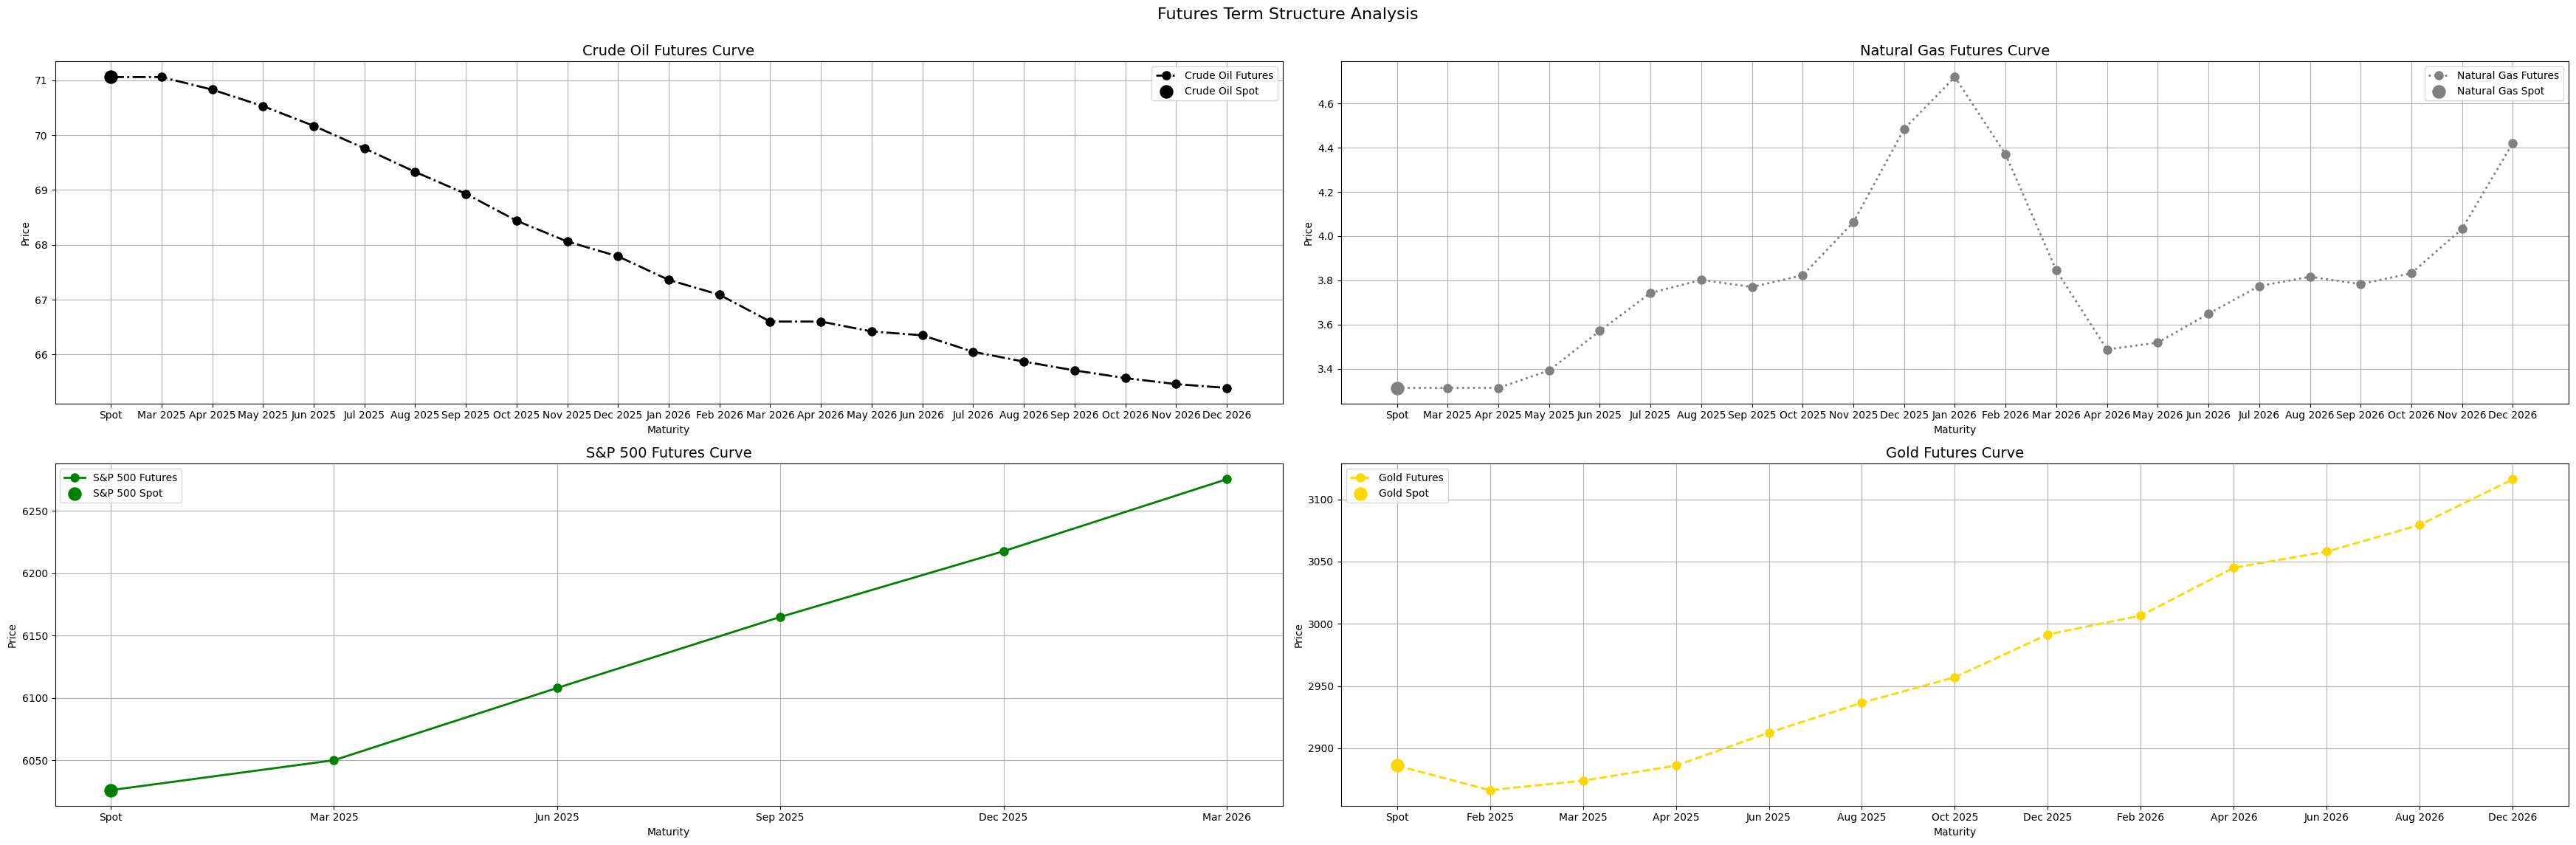

In [181]:
# Create subplots with a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(35, 12))
fig.suptitle('Futures Term Structure Analysis', fontsize=16, y=0.95)

# Flatten axes array for easier iteration
axes_flat = axes.flatten()

# Define styles for each asset
styles = {
    "Gold": {"color": "gold", "linestyle": "--"},
    "Crude Oil": {"color": "black", "linestyle": "-."},
    "Natural Gas": {"color": "gray", "linestyle": ":"},
   "S&P 500": {"color": "green", "linestyle": "-"}
}

# Plot each asset in a separate subplot
for idx, (asset, prices) in enumerate(futures_prices.items()):
    ax = axes_flat[idx]

    # X-axis labels (Spot + Futures months)
    months = ["Spot"] + list(prices.keys())
    prices_list = [spot_prices[asset]] + list(prices.values())

    # Plot futures curve
    ax.plot(months, prices_list,
            marker='o',
            linewidth=2,
            markersize=8,
            color=styles[asset]['color'],
           linestyle=styles[asset]['linestyle'],
            label=f"{asset} Futures")

    # Highlight spot price
    ax.scatter("Spot", spot_prices[asset],
              color=styles[asset]['color'],
               s=150,
               zorder=5,
               label=f"{asset} Spot")

    # Customize each subplot
    ax.set_title(f"{asset} Futures Curve", fontsize=14)
    ax.set_xlabel("Maturity")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###contango and backwardation describe the relationsihp between current prices and futures prices
- contango : futures prices are higher than the current price
- backwardation : futures prices are lower than the current price.


#####1. As of February 6, 2025, the crude oil futures market is exhibiting a backwardation pattern. This means that futures prices are less than the current spot price, which may be caused by trade policies and tariffs.

#####2. As of February 6, 2025, the natural gas futures market is exhibiting a contango pattern, where futures prices are higher than the current spot price. This structure suggests that there is higher natural gas prices in the future, possibly due to factors such as weather parterns (lunar new year impact and seasonal demand). Crude oil prices exhibit seasonal patterns, and futures contracts for January delivery often trade higher than the spot price, reflecting expectations of increased demand or supply constraints during the winter months

#####3. As of February 6, 2025, the gold futures market is exhibiting a contango pattern, where futures prices are higher than the current spot price.it has exhibited a upward trend recently and reach higher.possibly due to factors such as expected supply constraints or increased demand.

#####4. As of February 6, 2025, the S&P 500 futures market is exhibiting a contango structure, where futures prices are higher than the current spot price, mostly due to the cost of carry. but it decline for the next month and then rising, it may be caused by trade policies and tariffs that leading short term market pessimism.



In [177]:
# import yfinance as yf
# import pandas as pd
# import matplotlib.pyplot as plt
# from datetime import datetime

# # Get today's date
# today = datetime.today().strftime('%Y-%m-%d')

# # Define Futures Symbols
# futures_symbols = {
#     "Gold": "GC=F",
#     "Crude Oil": "CL=F",
#     "Natural Gas" : "NG=F",
#     "S&P 500": "ES=F"

# }

# # Create an empty dictionary to store futures data
# futures_data = {}

# # Fetch futures data for each commodity
# for commodity, symbol in futures_symbols.items():
#     try:
#         futures = yf.download(symbol, period="1y", interval="1mo")["Close"]
#         futures = futures.reset_index()
#         futures["Months to Maturity"] = (futures["Date"] - futures["Date"].min()).dt.days // 30
#         futures_data[commodity] = futures
#     except Exception as e:
#         print(f"Could not retrieve data for {commodity}: {e}")

# for commodity, symbol in futures_symbols.items():
# #for commodity in futures_data["Commodity"].unique():
#     print(commodity)
#     subset = futures_data[commodity]
#     plt.plot(subset["Months to Maturity"], subset[symbol], marker='o', linestyle='-', label=commodity)

# # Formatting the plot
# plt.xlabel("Months to Maturity (from today)")
# plt.ylabel("Futures Price (USD)")
# plt.title("Futures Prices vs. Time to Maturity (Gold, Crude Oil, Natural Gas, S&P 500)")
# plt.legend()
# plt.grid(True)

# # Show the plot

###b.Build a ML model to predict the fron month crude oil price (symbol: CL=F).  You can choose any time period for training the testing.

In [ ]:
# Install required packages if not already installed
# pip install yfinance pandas numpy matplotlib scikit-learn tensorflow keras

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import math

# Fetch historical crude oil futures prices
symbol = "CL=F"
data = yf.download(symbol, period="5y", interval="1d")  # 5 years of daily data
data = data[["Close"]].dropna()


#convert to numpy aarray
#We use 80 of the data for training
train_pct=0.8
dataset=data.values
train_data_len=math.ceil(len(dataset)*train_pct)
dataset.shape

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data.shape


#split dataset
n_period=70
#training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)):
    x_train.append(train_data[i-n_period:i])
    y_train.append(train_data[i,0])## index 60-110 - next 1 day record

x_train[0:1]

#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

#Reshape into 3D array
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))



#Build the LSTM model predicting next five days (Dense layer must give 5 outputs)
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1, epochs=1)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - loss: 0.0222
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - loss: 0.0013
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - loss: 0.0011


In [ ]:
# Create Test Data

test_data=scaled_data[train_data_len-70:,:]#This selects a portion of the scaled dataset that starts 70 time steps before the training data ends and includes all the remaining data.
x_test=[]
y_test=dataset[train_data_len:,:]

for i in range(n_period, len(test_data)):
    x_test.append(test_data[i - n_period:i, 0])  # Use past 60 days for prediction

# Convert to numpy arrays and reshape for LSTM
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions_scaled = model.predict(x_test)

# Predictions should have shape (num_samples, 5)
print(f"Predictions shape: {predictions_scaled.shape}")

# Inverse transform the data
predictions=predictions_scaled*(scaler.data_max_[0]-scaler.data_min_[0])+scaler.data_min_[0]

#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Predictions shape: (252, 5)


3.054292206537156

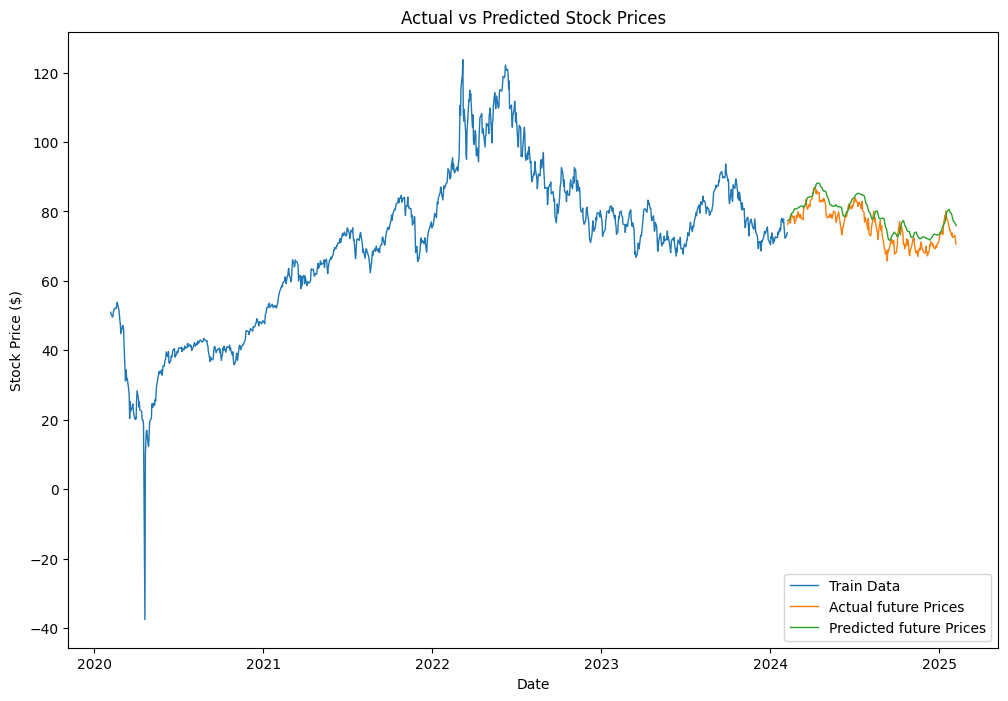

In [ ]:
#data=data['Close']

train = data[:train_data_len]  # Training data (up to train_data_len)
valid = data[train_data_len:]  # Test data (after train_data_len)

# Create a dataframe for the validation with predictions
valid = valid.assign(Predictions=predictions[:,0])  # predictions[:,0] selects the first column if multi-step prediction

# Plot the actual and predicted values
plt.figure(figsize=(12,8))
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.plot(train, lw=1, label='Train Data')
plt.plot(valid['Close'], lw=1, label='Actual future Prices')  # Plot actual test data
plt.plot(valid['Predictions'], lw=1, label='Predicted future Prices')  # Plot predicted values
plt.legend(loc='lower right')
plt.show()

##3.	Use the market data for options on SP500.
a.	What are implied volatility and volatility smile?


Implied Volatility (IV) is the market's expected future volatility of an asset's price, derived from option prices. It reflects how much traders expect the asset to move but does not predict the direction of the movement. the implied volatility of an option is the volatility for which the Black-Scholes-Merton price euqals the market price.

A volatility smile is a curve that shows how implied volatility varies for different option strike prices of the same expiration date.

###b.	Plot the volatility smiles for SP500 option prices for a relatively short maturity (for example, about 3 months) and a longer maturity (for example about 6 months). Comment on the shape of volatility smile.


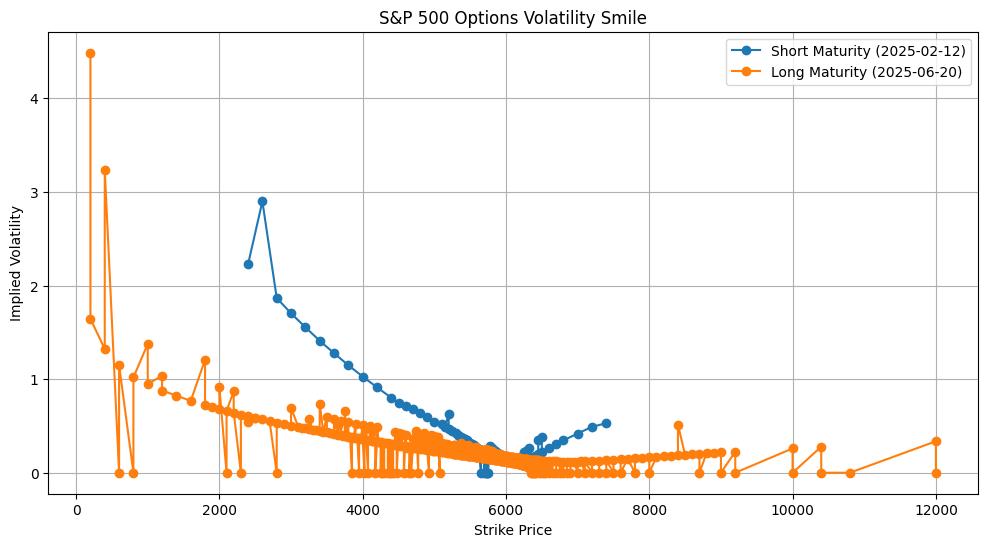

In [64]:
spx=yf.Ticker('^SPX')
options_dates = spx.options # get all avaialbe expiration date
# Select two expiration dates (one short-term ~3 months, one long-term ~6 months)
short_maturity =  options_dates[2]  # 3rd available expiration date (~3 months)
long_maturity =  options_dates[30]  # 6th available expiration date (~6 months)


# Fetch option chains for both maturities
opt_short = spx.option_chain(short_maturity)
opt_long = spx.option_chain(long_maturity)




# Extract strike prices and implied volatilities for calls and puts
def extract_volatility(option_chain):
    calls = option_chain.calls[["strike", "impliedVolatility"]].dropna()
    puts = option_chain.puts[["strike", "impliedVolatility"]].dropna()

    # Combine calls and puts
    options = pd.concat([calls, puts]).drop_duplicates().sort_values("strike")

    return options

# Get implied volatility data
vol_short = extract_volatility(opt_short)
vol_long = extract_volatility(opt_long)

# Plot Volatility Smiles
plt.figure(figsize=(12, 6))
plt.plot(vol_short["strike"], vol_short["impliedVolatility"], label=f"Short Maturity ({short_maturity})", marker="o")
plt.plot(vol_long["strike"], vol_long["impliedVolatility"], label=f"Long Maturity ({long_maturity})", marker="o")

# Formatting the plot
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("S&P 500 Options Volatility Smile")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [3]:
spx.options


('2025-02-07',
 '2025-02-10',
 '2025-02-11',
 '2025-02-12',
 '2025-02-13',
 '2025-02-14',
 '2025-02-18',
 '2025-02-19',
 '2025-02-20',
 '2025-02-21',
 '2025-02-24',
 '2025-02-25',
 '2025-02-26',
 '2025-02-27',
 '2025-02-28',
 '2025-03-03',
 '2025-03-04',
 '2025-03-05',
 '2025-03-06',
 '2025-03-07',
 '2025-03-10',
 '2025-03-11',
 '2025-03-14',
 '2025-03-17',
 '2025-03-21',
 '2025-03-28',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2025-12-31',
 '2026-01-16',
 '2026-02-20',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21',
 '2030-12-20')

In [ ]:
#Options expiring on a particular date - OPtion Chain
opt_chain = spx.option_chain(date='2025-09-30')
opt_chain

Options(calls=          contractSymbol             lastTradeDate  strike  lastPrice  \
0    SPXW250930C01200000 2025-01-08 03:46:14+00:00  1200.0    4725.80   
1    SPXW250930C01400000 2025-01-08 04:02:40+00:00  1400.0    4533.70   
2    SPXW250930C01600000 2025-01-08 05:08:27+00:00  1600.0    4340.30   
3    SPXW250930C02200000 2024-10-22 15:32:52+00:00  2200.0    3699.18   
4    SPXW250930C02400000 2024-10-22 15:32:52+00:00  2400.0    3508.91   
..                   ...                       ...     ...        ...   
107  SPXW250930C07400000 2025-01-31 18:36:09+00:00  7400.0       6.58   
108  SPXW250930C07500000 2025-02-04 14:41:32+00:00  7500.0       3.50   
109  SPXW250930C07600000 2025-02-03 15:10:45+00:00  7600.0       2.50   
110  SPXW250930C07800000 2025-02-05 17:06:29+00:00  7800.0       1.85   
111  SPXW250930C08000000 2025-01-28 18:17:59+00:00  8000.0       1.70   

         bid      ask  change  percentChange  volume  openInterest  \
0    4857.60  4902.80     0.0          

In [ ]:
opt_chain.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250930C01200000,2025-01-08 03:46:14+00:00,1200.0,4725.80,4858.00,4903.90,0.0,0.0,10.0,0,1.034154,True,REGULAR,USD
1,SPXW250930C01400000,2025-01-08 04:02:40+00:00,1400.0,4533.70,4664.00,4709.90,0.0,0.0,5.0,0,0.730197,True,REGULAR,USD
2,SPXW250930C01600000,2025-01-08 05:08:27+00:00,1600.0,4340.30,4470.10,4516.00,0.0,0.0,5.0,0,0.760317,True,REGULAR,USD
3,SPXW250930C02200000,2024-10-22 15:32:52+00:00,2200.0,3699.18,3812.80,3845.20,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD
4,SPXW250930C02400000,2024-10-22 15:32:52+00:00,2400.0,3508.91,3621.90,3654.40,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,SPXW250930C07400000,2025-01-31 18:36:09+00:00,7400.0,6.58,4.80,5.50,0.0,0.0,7.0,0,0.121515,False,REGULAR,USD
108,SPXW250930C07500000,2025-02-04 14:41:32+00:00,7500.0,3.50,3.50,4.00,0.0,0.0,1.0,0,0.122415,False,REGULAR,USD
109,SPXW250930C07600000,2025-02-03 15:10:45+00:00,7600.0,2.50,2.65,3.20,0.0,0.0,2.0,0,0.124948,False,REGULAR,USD
110,SPXW250930C07800000,2025-02-05 17:06:29+00:00,7800.0,1.85,1.65,2.15,0.0,0.0,1.0,0,0.130395,False,REGULAR,USD


In [ ]:
opt_chain.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250930P01200000,2025-02-03 21:10:06+00:00,1200.0,1.00,0.65,1.05,0.0,0.0,3.0,0,0.700687,False,REGULAR,USD
1,SPXW250930P01400000,2025-01-30 16:50:09+00:00,1400.0,1.35,1.05,1.40,0.0,0.0,2.0,0,0.657596,False,REGULAR,USD
2,SPXW250930P01600000,2025-02-03 16:04:01+00:00,1600.0,1.85,1.50,1.85,0.0,0.0,32.0,0,0.618351,False,REGULAR,USD
3,SPXW250930P01800000,2025-02-03 20:09:33+00:00,1800.0,2.40,2.05,2.45,0.0,0.0,29.0,0,0.583439,False,REGULAR,USD
4,SPXW250930P02000000,2025-02-03 20:30:57+00:00,2000.0,3.40,2.75,3.10,0.0,0.0,57.0,0,0.550847,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,SPXW250930P07000000,2024-11-06 17:57:30+00:00,7000.0,881.15,722.70,754.80,0.0,0.0,3.0,3,0.000010,True,REGULAR,USD
192,SPXW250930P07100000,2024-10-10 13:30:19+00:00,7100.0,1090.48,838.40,949.60,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
193,SPXW250930P07600000,2024-12-31 19:37:07+00:00,7600.0,1511.48,1321.80,1339.00,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
194,SPXW250930P07800000,2024-12-31 19:37:07+00:00,7800.0,1704.13,1521.20,1535.10,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD


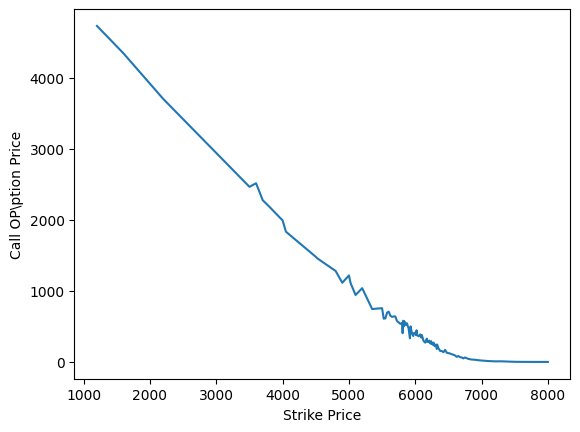

In [ ]:
plt.plot(opt_chain.calls.strike, opt_chain.calls.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Call OP\ption Price')
plt.show()

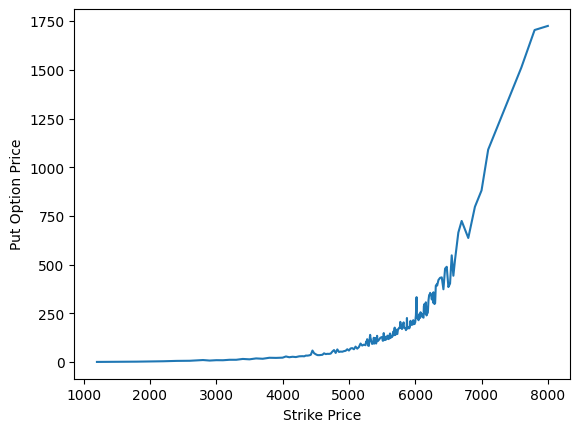

In [ ]:
plt.plot(opt_chain.puts.strike, opt_chain.puts.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Put Option Price')
plt.show()

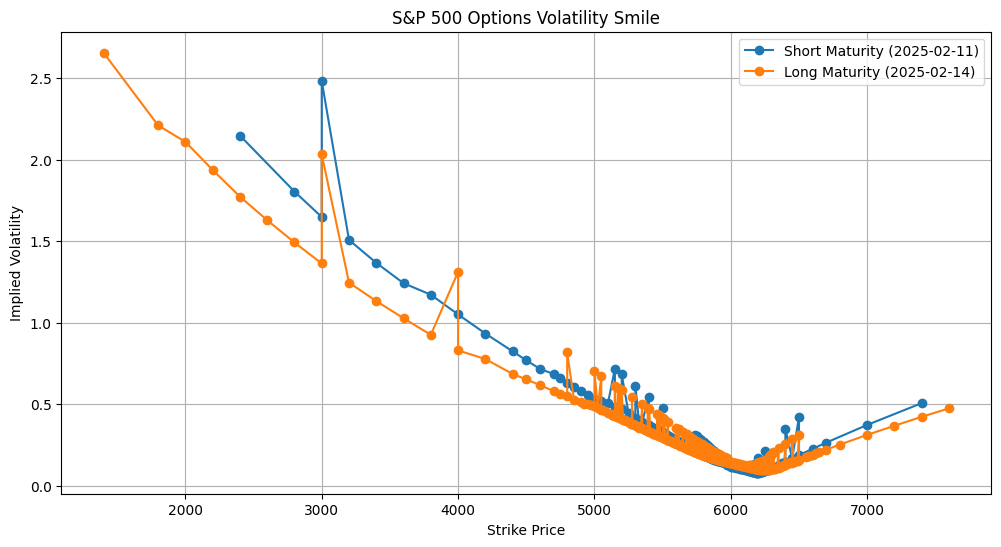

In [ ]:
options_dates = spx.options
# Select two expiration dates (one short-term ~3 months, one long-term ~6 months)
short_maturity = options_dates[2]  # 3rd available expiration date (~3 months)
long_maturity = options_dates[5]  # 6th available expiration date (~6 months)

# Fetch option chains for both maturities
opt_short = spx.option_chain(short_maturity)
opt_long = spx.option_chain(long_maturity)

# Extract strike prices and implied volatilities for calls and puts
def extract_volatility(option_chain):
    calls = option_chain.calls[["strike", "impliedVolatility"]].dropna()
    puts = option_chain.puts[["strike", "impliedVolatility"]].dropna()

    # Combine calls and puts
    options = pd.concat([calls, puts]).drop_duplicates().sort_values("strike")

    return options

# Get implied volatility data
vol_short = extract_volatility(opt_short)
vol_long = extract_volatility(opt_long)

# Plot Volatility Smiles
plt.figure(figsize=(12, 6))
plt.plot(vol_short["strike"], vol_short["impliedVolatility"], label=f"Short Maturity ({short_maturity})", marker="o")
plt.plot(vol_long["strike"], vol_long["impliedVolatility"], label=f"Long Maturity ({long_maturity})", marker="o")

# Formatting the plot
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("S&P 500 Options Volatility Smile")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
long_maturity

'2025-02-14'

In [ ]:
options_dates[5]

'2025-02-14'